<a href="https://colab.research.google.com/github/ElhaliAmina/Deep_Learning_Tp/blob/main/Traitement_de_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout, ZeroPadding2D, UpSampling2D
#from keras.layers.merge import _Merge
from keras.models import Model, Sequential
from keras import backend as K
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint 
from keras.utils import plot_model
from keras.initializers import RandomNormal
import keras
import cv2

**Load the Data from Kaggle**

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elhaliamina","key":"130cd80046a793218c4e2b6e69f15476"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download "nodoubttome/skin-cancer9-classesisic"


kaggle.json
 98% 772M/786M [00:11<00:00, 70.8MB/s]
100% 786M/786M [00:11<00:00, 73.4MB/s]


In [6]:
!unzip skin-cancer9-classesisic.zip

Archive:  skin-cancer9-classesisic.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer 

**Data Direction**

In [10]:
DATADIR_Train = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
DATADIR_Test = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [7]:
# Number of Train pictures
def num_pic(DATADIR):
  noOfFiles = 0
  noOfDir = 0
  for base, dirs, files in os.walk(DATADIR):
      for directories in dirs:
          noOfDir += 1
      for Files in files:
          noOfFiles += 1
  print('Number of files',noOfFiles)
  print('Number of Directories',noOfDir)
  print('Total:',(noOfDir + noOfFiles))

Lest's show number of pictures in each files(Train and Test)

In [8]:
num_pic(DATADIR_Train)

Number of files 2239
Number of Directories 9
Total: 2248


In [11]:
num_pic(DATADIR_Test)

Number of files 118
Number of Directories 9
Total: 127


Extract categories from files name

In [41]:
def find_categories(DATADIR):
  CATEGORIES  = list()
  for root, dirs, files in os.walk(DATADIR, topdown=False):
      for name in dirs:
          CATEGORIES.append(os.path.join(name))
  return CATEGORIES

In [42]:
CATEGORIES_Train=find_categories(DATADIR_Train)

In [43]:
CATEGORIES_Test=find_categories(DATADIR_Test)

**Show the data**

In [46]:
from random import shuffle
def create_data(CATEGORIES, DATADIR):
  data = []
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    #class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        data.append([img_array, category])
      except Exception as e:
          pass
  shuffle(data)
  return data


In [48]:
test_data=create_data(CATEGORIES_Test, DATADIR_Test)

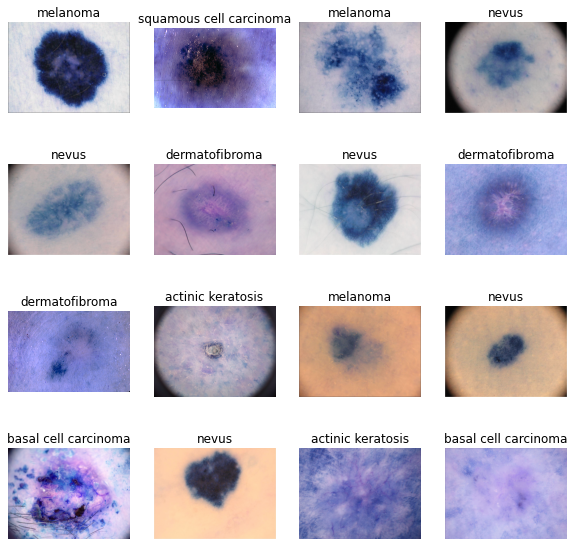

In [49]:
plt.figure(figsize=(10, 10))
i=1
import random 
for (img_array, class_num) in test_data:
    ax = plt.subplot(4, 4, i)
    i=i+1
    plt.imshow(img_array)
    plt.title(class_num)
    plt.axis("off")
    if i==17 :
      break